In [2]:
# 🚗 Car Purchase Amount Prediction

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 2. Load Dataset
df = pd.read_csv('../data/car_purchasing.csv', encoding='latin1')
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [4]:
# 3. Preprocessing
df = df.drop(['customer name', 'customer e-mail', 'country'], axis=1)

X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [5]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Train Models
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [7]:
# 6. Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression R2 Score: 0.9999999806028682
Random Forest R2 Score: 0.9498053965984983


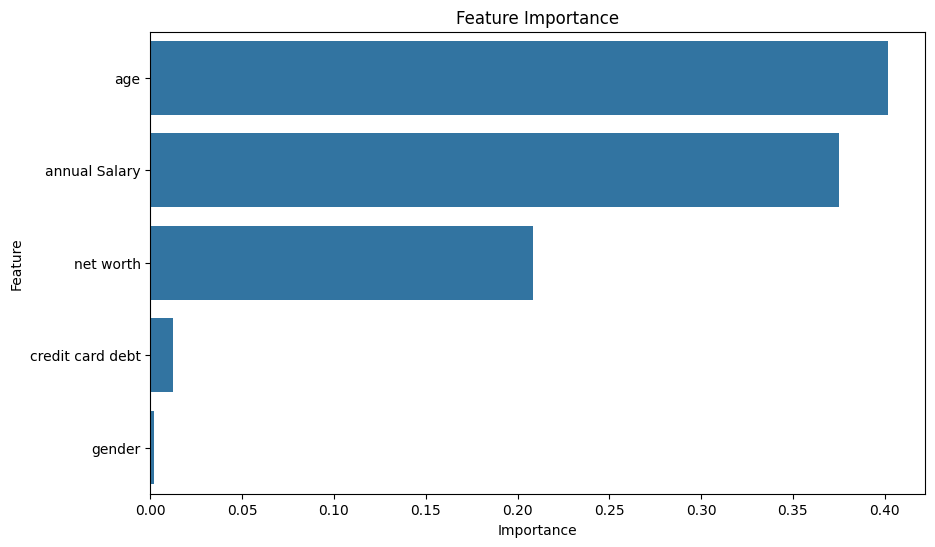

In [8]:
# 7. Feature Importance (Random Forest)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.savefig('../images/feature_importance.png')
plt.show()

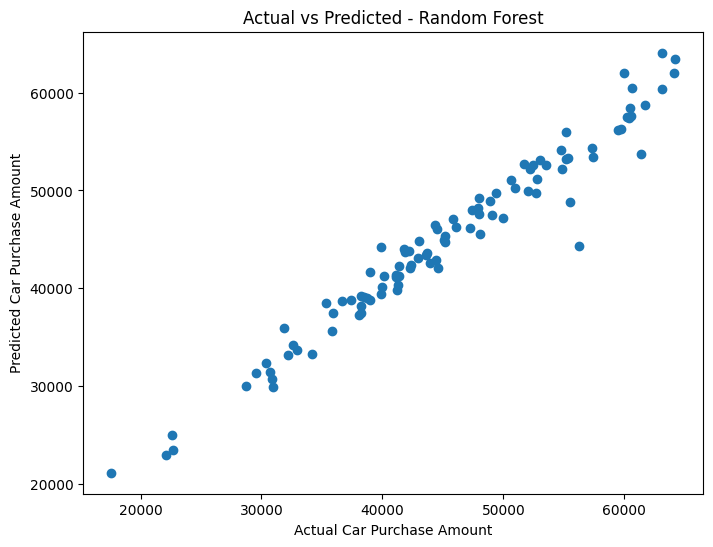

In [9]:
# 8. Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.title('Actual vs Predicted - Random Forest')
plt.savefig('../images/prediction_vs_actual.png')
plt.show()